# Matrix Applications: SVD & PCA 
**FIZ353 - Numerical Analysis | 20/11/2020**

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

# Two bodies, three springs



We had investigated a system of two bodies attached to three springs [in our FIZ220 - Computer Programming II course before](https://emresururi.github.io/FIZ220/FIZ220_EST_UygulamaNotlari_08_LineerCebir_Uygulamalari_2.html) (you can also refer to [Prof. Frank L.H. Wolfs' Phys235 Lecture Notes, chp. 12 on "Coupled Oscillations"](http://teacher.pas.rochester.edu/PHY235/LectureNotes/Chapter12/Chapter12.pdf)).

The general solution when there is no initial velocity, only initial displacements $x_1(0)$ & $x_2(0)$ is given by:

$$\begin{gathered}x_1(t)=2B_1\cos{\omega_1 t}+ 2B_2\cos{\omega_2 t}\\
x_2(t)=2B_1\cos{\omega_1 t}- 2B_2\cos{\omega_2 t}\end{gathered}$$

where:
$$\begin{gathered}B_1 = \frac{x_1(0)+x_2(0)}{4},\, B_2 = \frac{x_1(0)-x_2(0)}{4}\\
\Updownarrow\\
x_1(0) = 2\left(B_1+B_2\right),\, x_2(0) = 2\left(B_1-B_2\right)\end{gathered}$$

and $\omega_1 = \sqrt{\tfrac{k}{m}}$, $\omega_2 = \sqrt{\tfrac{k+2\kappa}{m}}$

(I'm well aware of the redundant '2' factor, alas just left it like that to be compatible with the general solution when one has **both** initial displacement _and_ velocity)

What we will do today is, we will obtain the position data for the system and after _forgetting_ about how we acquired them, will decompose it into modes using PCA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k1 = 3 # N/m # Spring constant
k2 = 5 

m1 = 1 # kg # Mass
m2 = 1

X1_0 =  7 # cm # initial displacement
X2_0 =  5

In [3]:
B1 = (X1_0 + X2_0)/4
B2 = (X1_0 - X2_0)/4

w1 = np.sqrt(k1/m1)
w2 = np.sqrt((k1+2*k2)/m1)

N = 50 # Number of observations

t = np.linspace(0,20,N)
x1 =  2*B1*np.cos(w1*t) + 2*B2*np.cos(w2*t)
x2 =  2*B1*np.cos(w1*t) - 2*B2*np.cos(w2*t)

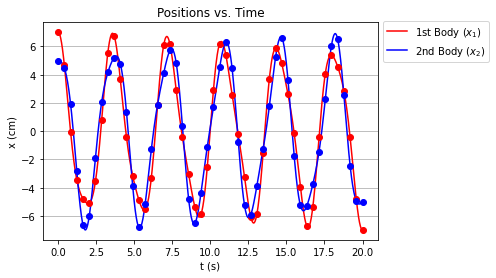

In [4]:
tt = np.linspace(0,20,1000)
xx1 =  2*B1*np.cos(w1*tt) + 2*B2*np.cos(w2*tt)
xx2 =  2*B1*np.cos(w1*tt) - 2*B2*np.cos(w2*tt)
#plt.plot(tt,xx1,"r-",tt,xx2,"b-")
plt.plot(tt,xx1,"r-")
plt.plot(tt,xx2,"b-")


plt.plot(t,x1,"or")
plt.plot(t,x2,"ob")
plt.xlabel("t (s)")
plt.ylabel("x (cm)")
#plt.yticks(np.arange(-5,6))
plt.title("Positions vs. Time")
plt.grid(axis='y')
plt.legend(("1st Body ($x_1$)","2nd Body ($x_2$)"),\
           bbox_to_anchor=(1, 1.03))

plt.show()

So, the harmonic motion is obvious. But keep in mind that this is the position vs. time graph. The projected displacement graphs would look like:

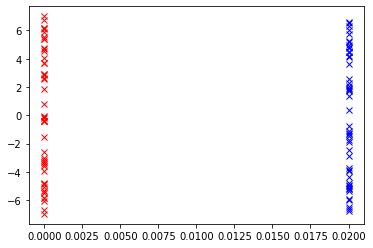

In [5]:
plt.plot(np.zeros((N,1)),x1,"xr")
plt.plot(np.zeros((N,1))+0.02,x2,"xb")
plt.show()

Before proceeding further, we are going the adjust the data by subtracting the mean of each set (i.e., "centering"), thus fixing the mean to 0. This is necessary to identify the SVD with the covariance matrix.

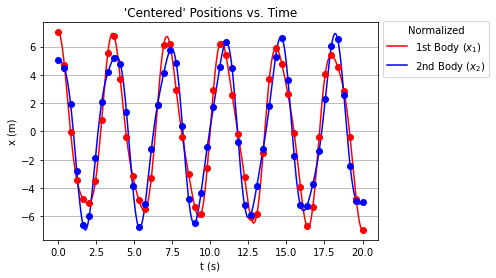

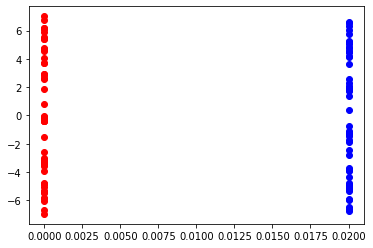

In [6]:
x1_norm = x1 - np.mean(x1)
x2_norm = x2 - np.mean(x2)

tt = np.linspace(0,20,1000)
xx1_norm = 2*B1*np.cos(w1*tt) + 2*B2*np.cos(w2*tt) - np.mean(xx1)
xx2_norm = 2*B1*np.cos(w1*tt) - 2*B2*np.cos(w2*tt) - np.mean(xx2)
#plt.plot(tt,xx1,"r-",tt,xx2,"b-")
plt.plot(tt,xx1_norm,"r-")
plt.plot(tt,xx2_norm,"b-")


plt.plot(t,x1_norm,"or")
plt.plot(t,x2_norm,"ob")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
#plt.yticks(np.arange(-5,6))
plt.title("'Centered' Positions vs. Time")
plt.grid(axis='y')
plt.legend(("1st Body ($x_1$)","2nd Body ($x_2$)"), \
           title="Normalized", bbox_to_anchor=(1, 1.03))
plt.show()

plt.plot(np.zeros((N,1)),x1_norm,"or")
plt.plot(np.zeros((N,1))+0.02,x2_norm,"ob")
plt.show()

For harmonic motions, means usually aren't that much large but still, it's good to take care. After the analysis, one can always go back to the original data set by adding the means (c.f. PCA section of our 5th Lecture Notes ("Matrix Decompositions | 06/11/2020).

In [7]:
print(np.mean(x1),np.mean(x2))

-0.011644573795265263 -0.015061002591783551


and this is how the relative motion of the two bodies looks like:

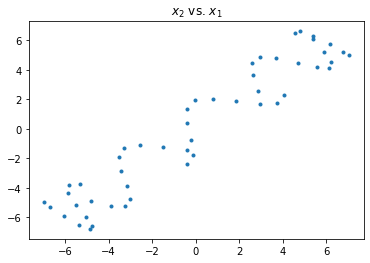

In [8]:
plt.plot(x1_norm,x2_norm,".")
plt.title("$x_2$ vs. $x_1$")
plt.show()

We are going to collect the centered $x_1$ and $x_2$ data into a data set called `data_all` so that we can calculate the covariance matrix directly:

In [9]:
data_all = np.array([x1_norm,x2_norm])
print(data_all[:,0:5])

[[ 7.01164457  4.67266654 -0.03135346 -3.41796165 -4.77305345]
 [ 5.015061    4.47812215  1.93287448 -2.82842056 -6.61441882]]


In [10]:
S = np.dot(data_all,data_all.T)/(N-1)
print(S)

[[19.49440528 18.24765088]
 [18.24765088 19.08107514]]


We can easily verify that this is indeed the covariance matrix:

In [11]:
Sigma = np.cov(data_all)
print(Sigma)

[[19.49440528 18.24765088]
 [18.24765088 19.08107514]]


Now comes the SVD decomposition. From here, one can see that, PCA is a very special case of SVD where the $A$ matrix is decomposed in such a way that $V=U$: 
$$ A=U\Sigma U^T$$

In [12]:
[u,s,vh]=np.linalg.svd(S)
print(u,"\n\n",s,"\n\n",vh)

[[-0.71109945 -0.70309144]
 [-0.70309144  0.71109945]] 

 [37.53656135  1.03891907] 

 [[-0.71109945 -0.70309144]
 [-0.70309144  0.71109945]]


As was the case with the SVD, the $\sigma$ values indicate the "importance" (or, more correctly, "dominance") of each of the unit vectors (hence, their directions). Also, due to the characteristic of SVD, the vectors are normal to each other.

From the vectors above, we see that their directions are along the $x_2\approx x_1$ ($m_1 = 0.989$)  and $x_2\approx -x_1$ ($m_2 = -1.011$). This means that, the first mode is dominant. (We have by the way, automatically identified the normal modes).

In [13]:
u1=u[:,0]
u2=u[:,1]
print("m1:{:10.6f}".format(u1[1]/u1[0]))
print("m2:{:10.6f}".format(u2[1]/u2[0]))
print(np.dot(u1,u2))
m1=u1[1]/u1[0]
m2=u2[1]/u2[0]

m1:  0.988739
m2: -1.011390
2.7755575615628914e-16


We seperately calculate the modes' decomposition by multiplying our vectors with the data - in other words, we are projecting the given data unto the principal axes. As the vectors are unit vectors, the actual results will differ by a scalar (can be positive or negative); keep in mind that what matters was the slopes, hence the directions.

In [14]:
res = np.dot(-u.T,data_all)

In [15]:
res.shape

(2, 50)

Here are the first 8 of each mode's components: the top row indicates the primary(/principal) component, and the next one being the secondary, etc.

In [16]:
with np.printoptions(formatter={'float': '{:7.3f}'.format}):
    print(res[:,0:8])

[[  8.512   6.471   1.337  -4.419  -8.045  -7.815  -3.835   2.000]
 [  1.364   0.101  -1.397  -0.392   1.348   0.715  -1.152  -0.918]]


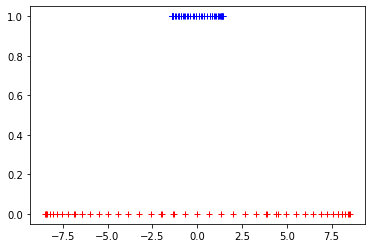

In [17]:
plt.plot(res[0,:],np.zeros(N),"r+")
plt.plot(res[1,:],np.zeros(N)+1,"b+")
plt.show()

Plotting the modes' components against each other and comparing it with the "$x_2$ vs $x_1$" graph above shows the success of the normalization process via the modes.

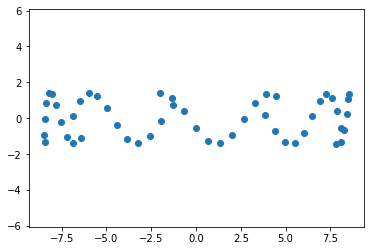

In [18]:
fig,ax = plt.subplots(1,1)
plt.plot(res[0,:], res[1,:],"o",)
ax.set_aspect('equal', 'datalim')
plt.show()

To put our findings into work, here is a comparison of the acquired components (denoted by "x") against "optimal" (/"convenient") coordinates formed from our actual data ("denoted by "o"):

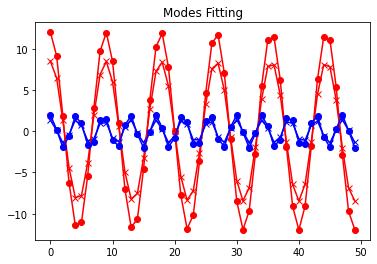

In [19]:
plt.title("Modes Fitting")
plt.plot(res[0,:],"rx-")
plt.plot(res[1,:],"bx-")
plt.plot((x1_norm+x2_norm),"ro-")
plt.plot((x1_norm-x2_norm),"bo-")
plt.show()

As commented above, it is usual that they differ by a scalar due to the normalized unit vectors.

And below, only the convenient coordinates formed from the actual data are presented:

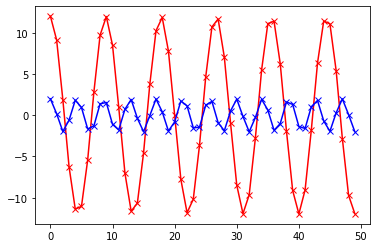

In [20]:
plt.plot((x1_norm+x2_norm),"rx-")
plt.plot((x1_norm-x2_norm),"bx-")
plt.show()

Here comes the essential part: fitting of the actual data along via principal component. 

In [21]:
m1,m2

(0.9887385610076743, -1.0113897034427868)

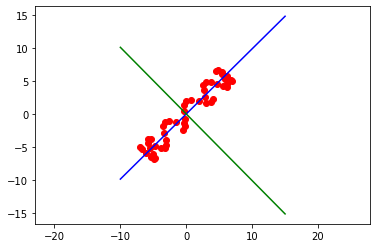

[37.53656135  1.03891907]


In [22]:
fig,ax1 = plt.subplots(1,1)
ax1.set_aspect('equal','datalim')
xxx = np.linspace(-10,15,100)
y1 = m1 * xxx
y2 = m2 * xxx

plt.plot(x1_norm,x2_norm,"ro",xxx,y1,"b-",xxx,y2,"g-")
plt.show()
print(s)

The $\sigma$ values tell us that we could represent this system as a "pure" mode 1 ($x_1(0) = x_2(0),\,\omega=\sqrt{\tfrac{k}{m}}$), and...

In [23]:
s[1]/np.sum(s)*100

2.6932109670845197

 ...would be off only by: 2.7% !